In [4]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [5]:
df_cr = pd.read_csv('crystal_data_22.csv')
df_cr.head(7)

,Growth_points,Solution_conc,Pressure,Temperature,Impurities_conc,Solution_volume,UV_radiation,Growth_time,Defect
0,10,0.0115,980,0,0.0000,240,1.022,34,0
1,0,0.0124,560,13,0.0105,218,0.452,21,0
2,0,0.0074,520,10,0.0036,278,0.269,22,0
3,0,0.0097,640,36,0.0100,368,0.600,25,0
4,8,0.0120,0,0,0.0000,300,0.183,38,1
5,6,0.0154,780,41,0.0140,461,0.571,27,0
6,1,0.0144,820,40,0.0000,413,0.607,28,0


In [6]:
df_cr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827 entries, 0 to 826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Growth_points    827 non-null    int64  
 1   Solution_conc    827 non-null    float64
 2   Pressure         827 non-null    int64  
 3   Temperature      827 non-null    int64  
 4   Impurities_conc  827 non-null    float64
 5   Solution_volume  827 non-null    int64  
 6   UV_radiation     827 non-null    float64
 7   Growth_time      827 non-null    int64  
 8   Defect           827 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 58.2 KB


In [7]:
df_cr.describe().T

,count,mean,std,min,25%,50%,75%,max
Growth_points,827.0,3.793229,3.362599,0.000,1.0000,3.0000,6.0000,17.0000
Solution_conc,827.0,0.012051,0.003169,0.000,0.0099,0.0116,0.0140,0.0199
Pressure,827.0,692.406288,191.133080,0.000,640.0000,720.0000,800.0000,1220.0000
Temperature,827.0,20.627570,15.912415,0.000,0.0000,23.0000,32.0000,99.0000
Impurities_conc,827.0,0.007971,0.011422,0.000,0.0000,0.0036,0.0126,0.0846
Solution_volume,827.0,319.918984,78.643967,0.000,273.5000,320.0000,366.0000,671.0000
UV_radiation,827.0,0.471844,0.334461,0.078,0.2400,0.3710,0.6135,2.4200
Growth_time,827.0,33.205562,11.873070,21.000,24.0000,29.0000,40.0000,81.0000
Defect,827.0,0.338573,0.473511,0.000,0.0000,0.0000,1.0000,1.0000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("Solarize_Light2")

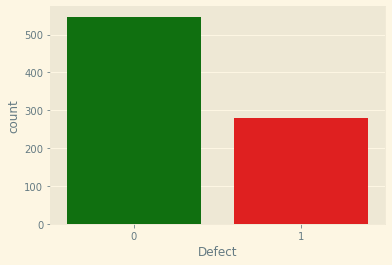

In [9]:
sns.countplot(df_cr['Defect'], palette=['g', 'r'])
plt.show();

In [10]:
coun = df_cr['Defect'].value_counts()
print(f'Без дефектов {coun[0]} .\nC дефектом {coun[1]} .')

Без дефектов 547 .
C дефектом 280 .


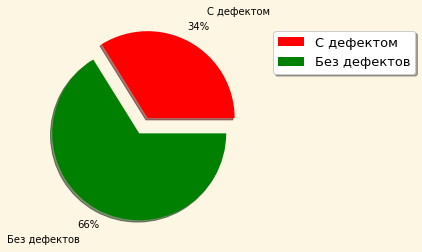

In [11]:
fig, ax = plt.subplots()

labels = ['С дефектом', 
         'Без дефектов']
percentages = [coun[1]/(coun[0] + coun[1]) * 100, coun[0]/(coun[0] + coun[1]) * 100] 
explode=(0.2,0)
ax.pie(percentages, explode=explode, labels=labels, autopct='%1.0f%%', 
       shadow=True, startangle=0,   
       pctdistance=1.2, labeldistance=1.4, colors=['r', 'g'])
ax.legend(frameon=True, bbox_to_anchor=(1.8,1), shadow=True, facecolor='w', prop={'size': 13})
plt.show()

In [12]:
for col in df_cr.columns:
    print(f"Минимум для столбца {col} равен {df_cr[col].min()}")

Минимум для столбца Growth_points равен 0
Минимум для столбца Solution_conc равен 0.0
Минимум для столбца Pressure равен 0
Минимум для столбца Temperature равен 0
Минимум для столбца Impurities_conc равен 0.0
Минимум для столбца Solution_volume равен 0
Минимум для столбца UV_radiation равен 0.078
Минимум для столбца Growth_time равен 21
Минимум для столбца Defect равен 0


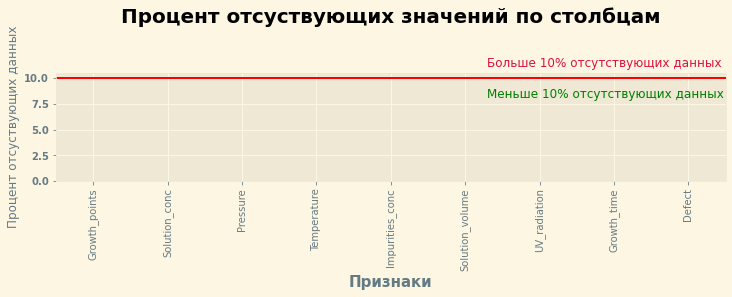

In [13]:
def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 2, width = 12, h=10):
    
    '''Выводит график процента отсуствующих данных в выборке'''
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Процент отсуствующих значений по столбцам\n\n', fontsize=20, weight='bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, h,
             f'Больше {thresh}% отсутствующих данных', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 1,
             f'Меньше {thresh}% отсутствующих данных', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Признаки', size=15, weight='bold')
    plt.ylabel('Процент отсуствующих данных')
    plt.yticks(weight ='bold')
    
    return plt.show()
msv_1(df_cr, 10, color=sns.color_palette('Reds',15), h=12)

In [14]:
df_cr[['Solution_conc', 'Pressure', 'Temperature', 'Impurities_conc', 'Solution_volume']] =\
df_cr[['Solution_conc', 'Pressure', 'Temperature', 'Impurities_conc',\
       'Solution_volume']].replace(0, np.nan)

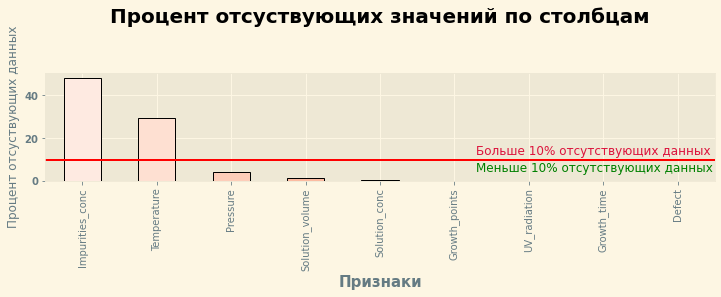

In [15]:
msv_1(df_cr, 10, color=sns.color_palette('Reds',15), h=17)

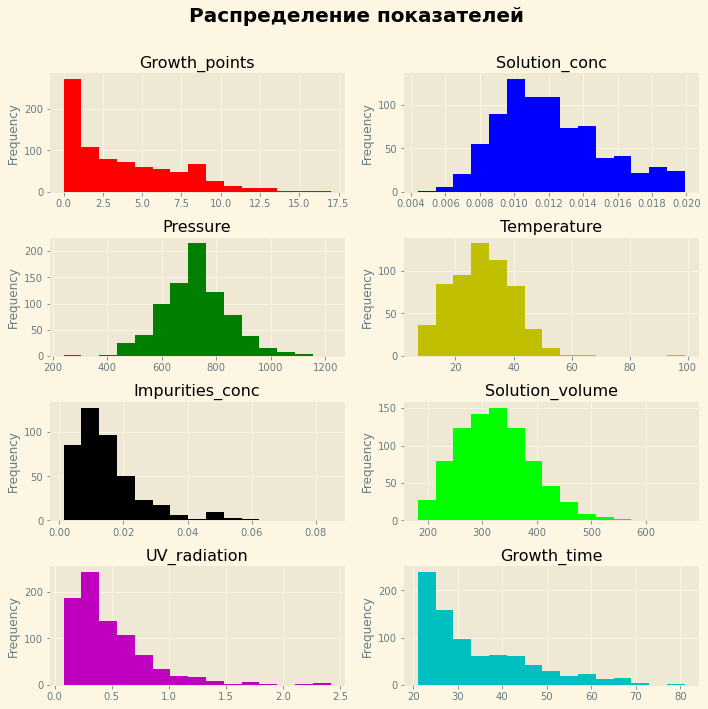

In [16]:
fig, axes = plt.subplots(4, 2, figsize=(10, 10))
axes = axes.flatten()
color = ['r', 'b', 'g', 'y', 'k', 'lime', 'm', 'c']
ax_idx = 0
columns = df_cr.drop('Defect', axis = 1).columns
for col in columns:
    df_cr[col].plot(kind = 'hist', ax = axes[ax_idx], title = col, color =color[ax_idx], bins=15) 
    ax_idx += 1

plt.suptitle('Распределение показателей\n', fontsize=20, weight='bold')
plt.tight_layout()
plt.show()

In [17]:
from scipy.stats import skew
for col in df_cr.drop('Defect', axis = 1).columns:
    print(f"Ассиметрия для столбца {col} составляет {df_cr[col].skew():.2f}")

Ассиметрия для столбца Growth_points составляет 0.91
Ассиметрия для столбца Solution_conc составляет 0.56
Ассиметрия для столбца Pressure составляет 0.19
Ассиметрия для столбца Temperature составляет 0.63
Ассиметрия для столбца Impurities_conc составляет 2.15
Ассиметрия для столбца Solution_volume составляет 0.58
Ассиметрия для столбца UV_radiation составляет 1.97
Ассиметрия для столбца Growth_time составляет 1.15


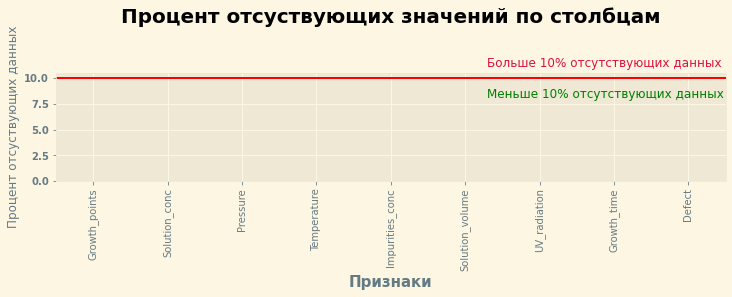

In [18]:
for col_1 in ['Growth_points', 'Solution_conc', 'Pressure', 'Temperature', 'Solution_volume']:
    df_cr[col_1] = df_cr[col_1].fillna(df_cr[col_1].mean()) 
    
for col_2 in ['Impurities_conc', 'UV_radiation', 'Growth_time']:    
    df_cr[col_2] = df_cr[col_2].fillna(df_cr[col_2].median())  

msv_1(df_cr, 10, color=sns.color_palette('Greens',15), h=12)

In [19]:
df_cr.isnull().sum()

Growth_points      0
Solution_conc      0
Pressure           0
Temperature        0
Impurities_conc    0
Solution_volume    0
UV_radiation       0
Growth_time        0
Defect             0
dtype: int64

In [20]:
def distplot(col_name):
    """
   Строит плотность распределения столбца 'col_name' отдельно для образцов с дефектами и без 
    
    """
    plt.figure(figsize=(6, 4))
    ax = sns.distplot(df_cr[col_name][df_cr.Defect == 1], color ="r", rug = True)
    sns.distplot(df_cr[col_name][df_cr.Defect == 0], color ="g",rug = True)
    plt.legend(['С дефектом', 'Без дефекта'], prop={'size': 13}, frameon=True,
               bbox_to_anchor=(1,1), shadow=True,\
               facecolor='w')

In [21]:
def mean_target(var):
    """
    Группирует данные столбца 'var' по категориям и выводит среднее значение каждой категории
    
    """
    pd.set_option('display.float_format', '{:.3f}'.format)
    return pd.DataFrame(df_cr.groupby('Defect').mean()[var])

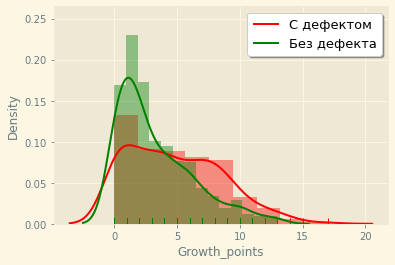

In [22]:
distplot('Growth_points')

In [23]:
mean_target('Growth_points')

,Growth_points
Defect,
0,3.258
1,4.839


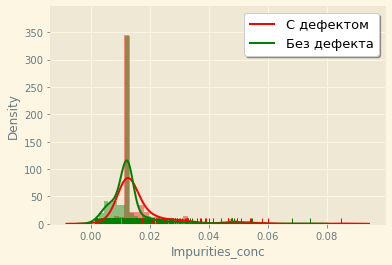

In [24]:
distplot('Impurities_conc')

In [25]:
mean_target('Impurities_conc')

,Impurities_conc
Defect,
0,0.013
1,0.017


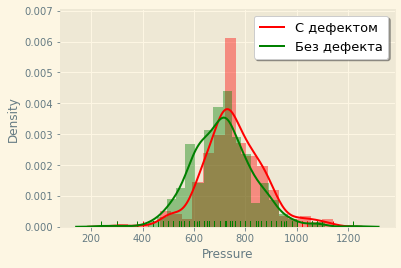

In [26]:
distplot('Pressure')

In [27]:
mean_target('Pressure')

,Pressure
Defect,
0,709.569
1,751.952


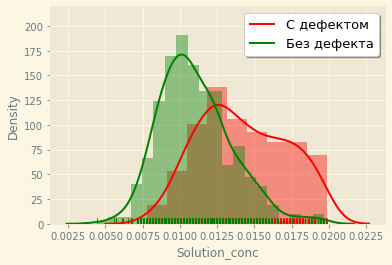

In [28]:
distplot('Solution_conc')

In [29]:
mean_target('Solution_conc')

,Solution_conc
Defect,
0,0.011
1,0.014


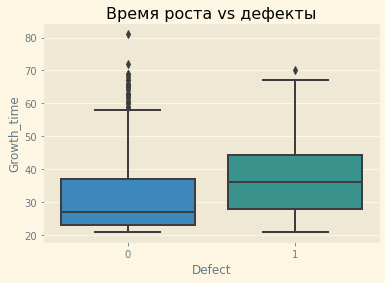

In [30]:
sns.boxplot(x = 'Defect', y = 'Growth_time', data = df_cr)
plt.title('Время роста vs дефекты')
plt.show();

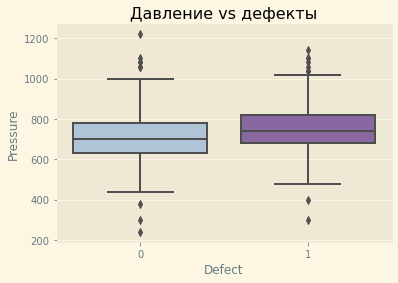

In [31]:
sns.boxplot(x = 'Defect', y = 'Pressure', data = df_cr, palette = 'BuPu')
plt.title('Давление vs дефекты')
plt.show();

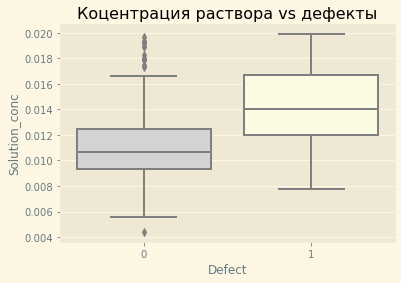

In [32]:
my_pal = {0: "lightgrey", 1: "lightyellow"}
sns.boxplot(x = 'Defect', y = 'Solution_conc', data = df_cr, palette = my_pal)
plt.title('Коцентрация раствора vs дефекты')
plt.show();

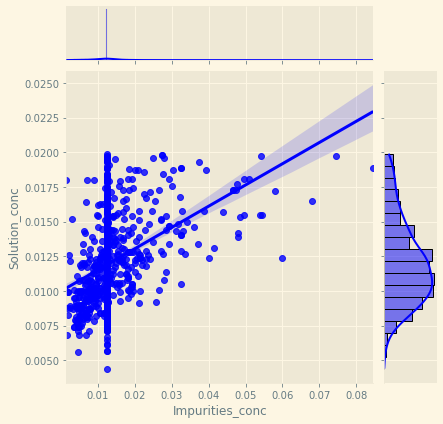

In [33]:
sns.jointplot(x='Impurities_conc',y='Solution_conc', data=df_cr, kind = 'reg', color = 'b')
plt.show();

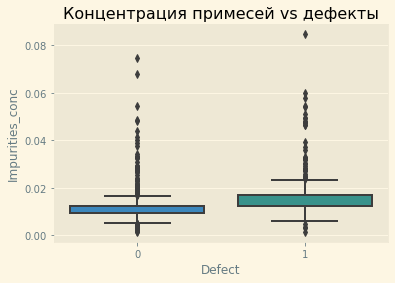

In [34]:
sns.boxplot(x = 'Defect', y = 'Impurities_conc', data = df_cr)
plt.title('Концентрация примесей vs дефекты')
plt.show();

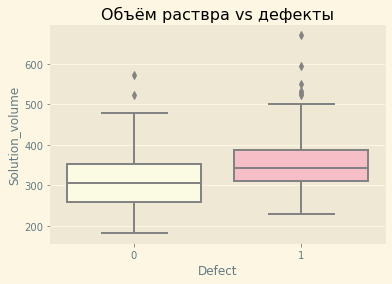

In [35]:
my_pal = {0: "lightyellow", 1: "lightpink"}
sns.boxplot(x = 'Defect', y = 'Solution_volume', data = df_cr, palette = my_pal)
plt.title('Объём раствра vs дефекты')
plt.show();

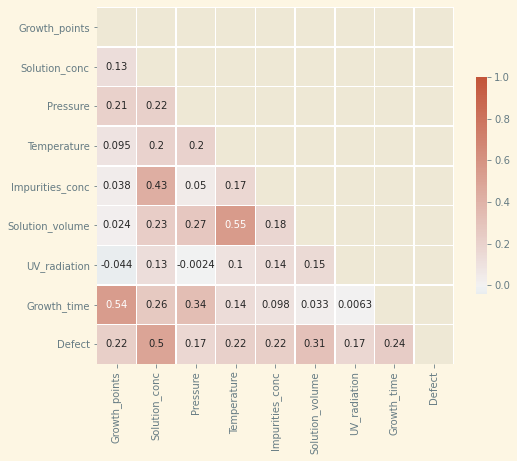

In [36]:
corr = df_cr.corr()

# Создаем маску
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 8))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True);

In [37]:
from sklearn.model_selection import train_test_split

X = df_cr.drop('Defect', axis = 1)
y = df_cr['Defect']

X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = ['Growth_points', 'Solution_conc', 'Pressure', 'Temperature', 'Impurities_conc',\
                 'Solution_volume', 'UV_radiation', 'Growth_time']
X_train =  pd.DataFrame(sc.fit_transform(X_train),
        columns=cols)
X_test = pd.DataFrame(sc.fit_transform(X_test),
        columns=cols)

In [39]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

def evaluation(model, x_train_std, y_train, x_test, y_test, train = True):
    """
    Функция, которая возвращает оценку данных по всем требуемым метрикам
    """
    if train == True:
        pred = model.predict(x_train_std)
        classifier_report = pd.DataFrame(classification_report(y_train, pred, output_dict = True))
        print("Результат на обучающей выборке:\n================================================")
        print(f"Оценка точности: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Значение F1: {round(f1_score(y_train, pred), 2)}")
        print("_______________________________________________")
        print(f"Отчет по классификации:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(y_train, pred)}\n")
        
    if train == False:
        pred = model.predict(x_test)
        classifier_report = pd.DataFrame(classification_report(y_test, pred, output_dict = True))
        print("Результаты на тестовых данных:\n================================================")
        print(f"Оценка точности: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Значение F1: {round(f1_score(y_test, pred), 2)}")
        print("_______________________________________________")
        print(f"Отчет по классификации:\n{classifier_report}")
        print("_______________________________________________")
        print(f"Матрица ошибок: \n {confusion_matrix(y_test, pred)}\n")

In [40]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)

evaluation(lr, X_train, y_train, X_test, y_test, True)
print()
evaluation(lr, X_train, y_train, X_test, y_test, False)

Результат на обучающей выборке:
Оценка точности: 77.26%
_______________________________________________
Значение F1: 0.62
_______________________________________________
Отчет по классификации:
                0       1  accuracy  macro avg  weighted avg
precision   0.796   0.709     0.773      0.752         0.766
recall      0.883   0.557     0.773      0.720         0.773
f1-score    0.837   0.624     0.773      0.730         0.765
support   410.000 210.000     0.773    620.000       620.000
_______________________________________________
Матрица ошибок: 
 [[362  48]
 [ 93 117]]


Результаты на тестовых данных:
Оценка точности: 77.29%
_______________________________________________
Значение F1: 0.62
_______________________________________________
Отчет по классификации:
                0      1  accuracy  macro avg  weighted avg
precision   0.796  0.709     0.773      0.753         0.767
recall      0.883  0.557     0.773      0.720         0.773
f1-score    0.837  0.624     0.773   

In [41]:
train_score_lr = round(accuracy_score(y_train, lr.predict(X_train)) * 100, 2)
test_score_lr = round(accuracy_score(y_test, lr.predict(X_test)) * 100, 2)

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

evaluation(dtc, X_train, y_train, X_test, y_test, True)
print()
evaluation(dtc, X_train, y_train, X_test, y_test, False)

Результат на обучающей выборке:
Оценка точности: 100.00%
_______________________________________________
Значение F1: 1.0
_______________________________________________
Отчет по классификации:
                0       1  accuracy  macro avg  weighted avg
precision   1.000   1.000     1.000      1.000         1.000
recall      1.000   1.000     1.000      1.000         1.000
f1-score    1.000   1.000     1.000      1.000         1.000
support   410.000 210.000     1.000    620.000       620.000
_______________________________________________
Матрица ошибок: 
 [[410   0]
 [  0 210]]


Результаты на тестовых данных:
Оценка точности: 71.50%
_______________________________________________
Значение F1: 0.59
_______________________________________________
Отчет по классификации:
                0      1  accuracy  macro avg  weighted avg
precision   0.795  0.573     0.715      0.684         0.720
recall      0.766  0.614     0.715      0.690         0.715
f1-score    0.781  0.593     0.715   

In [43]:
train_score_dtc = round(accuracy_score(y_train, dtc.predict(X_train)) * 100, 2)
test_score_dtc = round(accuracy_score(y_test, dtc.predict(X_test)) * 100, 2)

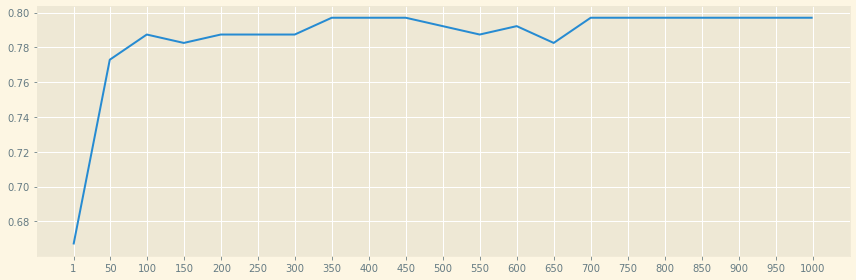

In [44]:
from sklearn.ensemble import RandomForestClassifier
## Определим правильное количество деревьев
accuracy_scores = []
tree = [_ if _!=0 else 1 for _ in range(0, 1001, 50) ]
for i in tree:
    rfc = RandomForestClassifier(n_estimators = i, random_state = 0)
    rfc.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, rfc.predict(X_test)))
    
plt.figure(figsize=(12, 4))
plt.xticks(
    np.linspace(1, 1000, 21),
    tree)
plt.grid(visible=True, which='major', c = 'w')
plt.plot(tree, accuracy_scores)
plt.tight_layout()
plt.show();

In [45]:
rfc = RandomForestClassifier(n_estimators = 350)
rfc.fit(X_train, y_train)

evaluation(rfc, X_train, y_train, X_test, y_test, True)
print()
evaluation(rfc, X_train, y_train, X_test, y_test, False)

Результат на обучающей выборке:
Оценка точности: 100.00%
_______________________________________________
Значение F1: 1.0
_______________________________________________
Отчет по классификации:
                0       1  accuracy  macro avg  weighted avg
precision   1.000   1.000     1.000      1.000         1.000
recall      1.000   1.000     1.000      1.000         1.000
f1-score    1.000   1.000     1.000      1.000         1.000
support   410.000 210.000     1.000    620.000       620.000
_______________________________________________
Матрица ошибок: 
 [[410   0]
 [  0 210]]


Результаты на тестовых данных:
Оценка точности: 80.68%
_______________________________________________
Значение F1: 0.67
_______________________________________________
Отчет по классификации:
                0      1  accuracy  macro avg  weighted avg
precision   0.813  0.788     0.807      0.801         0.805
recall      0.920  0.586     0.807      0.753         0.807
f1-score    0.863  0.672     0.807   

In [46]:
train_score_rfc = round(accuracy_score(y_train, rfc.predict(X_train)) * 100, 2)
test_score_rfc = round(accuracy_score(y_test, rfc.predict(X_test)) * 100, 2)

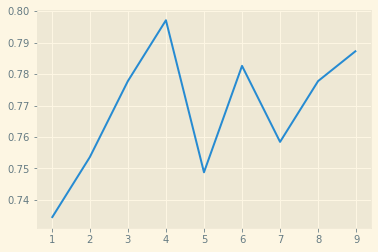

In [47]:
from sklearn.neighbors import KNeighborsClassifier
## Определим оптимальное количество соседей
accuracy_scores = []
i = []
for _ in range(1, 10):
    i.append(_)
    knn = KNeighborsClassifier(n_neighbors = _)
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))
    
plt.plot(i, accuracy_scores);

In [48]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)

evaluation(knn, X_train, y_train, X_test, y_test, True)
evaluation(knn, X_train, y_train, X_test, y_test, False)

Результат на обучающей выборке:
Оценка точности: 81.61%
_______________________________________________
Значение F1: 0.67
_______________________________________________
Отчет по классификации:
                0       1  accuracy  macro avg  weighted avg
precision   0.805   0.858     0.816      0.831         0.823
recall      0.954   0.548     0.816      0.751         0.816
f1-score    0.873   0.669     0.816      0.771         0.804
support   410.000 210.000     0.816    620.000       620.000
_______________________________________________
Матрица ошибок: 
 [[391  19]
 [ 95 115]]

Результаты на тестовых данных:
Оценка точности: 79.71%
_______________________________________________
Значение F1: 0.66
_______________________________________________
Отчет по классификации:
                0      1  accuracy  macro avg  weighted avg
precision   0.810  0.759     0.797      0.785         0.793
recall      0.905  0.586     0.797      0.745         0.797
f1-score    0.855  0.661     0.797    

In [49]:
train_score_knn = round(accuracy_score(y_train, knn.predict(X_train)) * 100, 2)
test_score_knn = round(accuracy_score(y_test, knn.predict(X_test)) * 100, 2)

In [50]:
models = {
           'Точность обучение': [train_score_lr, train_score_dtc, train_score_rfc, train_score_knn],
          'Точность тест' : [test_score_lr, test_score_dtc, test_score_rfc, test_score_knn]
         }

models = pd.DataFrame(models, index = ['Логис.регрессия', 'Деревья решений',
                                       'Случайный лес', 'K-ближайших соседей'])
models.head()

,Точность обучение,Точность тест
Логис.регрессия,77.260,77.290
Деревья решений,100.000,71.500
Случайный лес,100.000,80.680
K-ближайших соседей,81.610,79.710


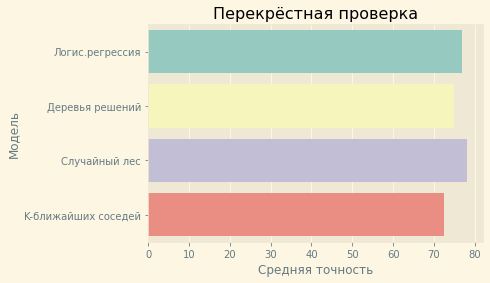

In [51]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=10)

random_state = 0
classifiers = []
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state, n_estimators = 500))
classifiers.append(KNeighborsClassifier())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy",\
                                      cv = kfold, n_jobs=-1))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean() * 100)
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"Средняя, %":cv_means,"Станд.отклонение": cv_std,\
                       "Модель":['Логис.регрессия', 'Деревья решений',
                                       'Случайный лес', 'K-ближайших соседей']})

g = sns.barplot("Средняя, %","Модель",data = cv_res, palette="Set3",\
                orient = "h",**{'xerr':cv_std})
g.set_xlabel("Средняя точность")
g = g.set_title("Перекрёстная проверка")

In [52]:
cv_res

,"Средняя, %",Станд.отклонение,Модель
0,76.935,0.049,Логис.регрессия
1,74.839,0.043,Деревья решений
2,78.065,0.045,Случайный лес
3,72.419,0.062,K-ближайших соседей


In [53]:
from sklearn.model_selection import GridSearchCV

RFC = RandomForestClassifier()


## Поиск оптимальных параметров
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,350],
              "criterion": ["gini"]}
gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4,\
                     verbose = 1)
gsRFC.fit(X_train,y_train)

RFC_best = gsRFC.best_estimator_

# Лучший результат
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   32.1s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.5min
[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:  4.9min finished


0.7935483870967742

In [ ]:
print(RFC_best)

In [ ]:
303